In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("score_updated.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Shown below is a scatter plot of the scores indicating a clear linear relationship

<function matplotlib.pyplot.show(close=None, block=None)>

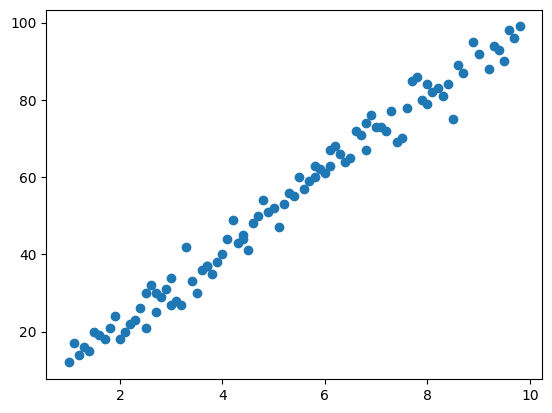

In [4]:
plt.scatter(data.Hours, data.Scores)
plt.show

This function implements the mean squared error formula, working as a loss function to minimise during the algorithm setup

In [5]:
def mse(m, b, points):
    error = 0
    for i in range(len(points)):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores
        error += (y - (m*x+b))**2
    error = error / len(points)

This function takes in the values of the current gradient (m) and intercept (b), points for iteration and rate at how aggressive the function is.

For both the gradient and the intercept, the differentiation of the MSE formula is found and the value is shifted towards the more optimum solution
using a sense

In [7]:
def gradient(m, b, points, rate):
    gradient = 0
    intercept = 0

    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores
        gradient += -2/n * x * (y - (m*x+b))
        intercept += -2/n * (y - (m*x+b))

    m_change = m - gradient * rate
    b_change = b - intercept * rate

    return m_change, b_change

0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
9.925125857810857 1.7109503719388002


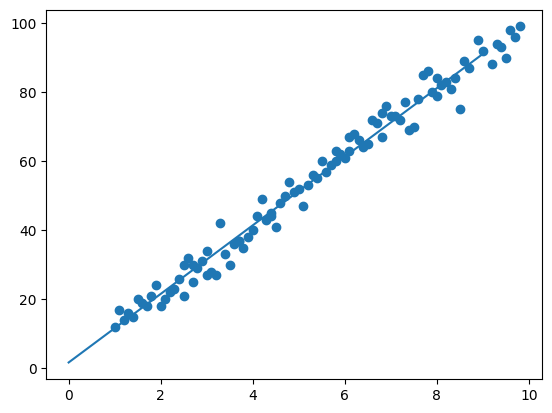

In [8]:
m = 0
b = 0
rate = 0.002
cycles = 1000

for i in range(cycles):
    m, b = gradient(m, b, data, rate)
    if(i%100==0):
        print(i/10,"%")

print(m, b)

plt.scatter(data.Hours, data.Scores)
plt.plot(list(range(0, 10)), [m*x+b for x in range(0, 10)])
plt.show()